In [45]:
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import rc
import matplotlib.ticker as ticker

In [73]:
rc('text', usetex=False)
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [2]:
#GPT

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# 1. Load the Data
#df = pd.read_pickle("data_file/master_df_final.pkl")
df = pd.read_pickle("data_file/master_df_hd172555.pkl")
#master_df_hd172555

2024-08-27 09:41:33.628956: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 09:41:33.630265: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 09:41:33.657274: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 09:41:33.658473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 09:41:34.103851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
df2 = pd.read_csv("data_file/velocity_hd.csv")
df2

,Unnamed: 0,Velocity
0,0,-1532.015525
1,1,-1529.395335
2,2,-1526.775168
3,3,-1524.155023
4,4,-1521.534902
...,...,...
1166,1166,1507.703306
1167,1167,1510.297064
1168,1168,1512.890799
1169,1169,1515.484512


In [5]:
df3 = pd.read_pickle("data_file/master_df_hd172555_1.pkl")
df3

,Object,Flux,MJD-Obs,Date-Obs
0,ADP.2014-10-01T10:21:59.297,"[0.82064288854599, 0.8216624408960342, 0.82196...",53147.209007,2004-05-22T05:00:58.227
1,ADP.2014-10-01T10:23:12.613,"[0.8084616661071777, 0.8129723221063614, 0.825...",53147.214264,2004-05-22T05:08:32.442
2,ADP.2014-10-01T10:19:23.563,"[0.8131369352340698, 0.8200299441814423, 0.815...",53147.219533,2004-05-22T05:16:07.656
3,ADP.2014-10-01T10:21:02.330,"[0.827789306640625, 0.8204552382230759, 0.8106...",53147.255803,2004-05-22T06:08:21.409
4,ADP.2014-10-01T10:22:20.273,"[0.8174574375152588, 0.8118058145046234, 0.809...",53147.259888,2004-05-22T06:14:14.362
...,...,...,...,...
134,ADP.2016-04-20T08:25:54.640,"[0.8067248463630676, 0.8147405385971069, 0.806...",57494.332932,2016-04-16T07:59:25.289
135,ADP.2016-04-20T08:25:54.642,"[0.8204373121261597, 0.8111877888441086, 0.810...",57494.334449,2016-04-16T08:01:36.366
136,ADP.2016-04-20T08:25:54.650,"[0.8134812712669373, 0.8066895008087158, 0.801...",57494.335964,2016-04-16T08:03:47.293
137,ADP.2016-04-20T08:25:54.656,"[0.8065048456192017, 0.8109097182750702, 0.807...",57494.338996,2016-04-16T08:08:09.288


In [6]:
#len(reconstructed_flux)

In [7]:
#flux_normalized.shape

In [8]:
# 2. Extract the Flux Data (columns 0 to 1169)
flux_data = df.iloc[:, 0:1170].values
# 3. Normalize the Flux Data
scaler = MinMaxScaler()
scaler2 = StandardScaler()
flux_normalized = scaler2.fit_transform(flux_data)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,1162,1163,1164,1165,1166,1167,1168,1169,MJD-Obs,Date-Obs
ADP.2014-10-01T10:21:59.297,0.820643,0.821662,0.821966,0.818749,0.827753,0.826377,0.826391,0.831695,0.831094,0.827595,...,0.928162,0.933011,0.944432,0.947090,0.944214,0.937842,0.951385,0.938903,53147.209007,2004-05-22T05:00:58.227
ADP.2014-10-01T10:23:12.613,0.808462,0.812972,0.825646,0.816023,0.825784,0.826648,0.823716,0.828019,0.825331,0.832333,...,0.937241,0.941641,0.939405,0.948713,0.946548,0.948527,0.946427,0.937623,53147.214264,2004-05-22T05:08:32.442
ADP.2014-10-01T10:19:23.563,0.813137,0.820030,0.815568,0.814296,0.820129,0.817477,0.820364,0.812316,0.815697,0.825057,...,0.938723,0.938102,0.939452,0.946149,0.945624,0.945165,0.943878,0.948568,53147.219533,2004-05-22T05:16:07.656
ADP.2014-10-01T10:21:02.330,0.827789,0.820455,0.810643,0.816685,0.820258,0.823479,0.820917,0.821842,0.828238,0.830170,...,0.934453,0.934225,0.940024,0.949337,0.946441,0.945588,0.944348,0.945563,53147.255803,2004-05-22T06:08:21.409
ADP.2014-10-01T10:22:20.273,0.817457,0.811806,0.809975,0.809365,0.823448,0.813712,0.818674,0.819766,0.818270,0.825963,...,0.927621,0.936293,0.937438,0.933940,0.942413,0.944738,0.942874,0.938728,53147.259888,2004-05-22T06:14:14.362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADP.2016-04-20T08:25:54.640,0.806725,0.814741,0.806403,0.797748,0.804336,0.804502,0.809395,0.803496,0.808407,0.808621,...,0.962193,0.958954,0.970503,0.971931,0.970817,0.962171,0.967922,0.968089,57494.332932,2016-04-16T07:59:25.289
ADP.2016-04-20T08:25:54.642,0.820437,0.811188,0.810333,0.804006,0.797484,0.802816,0.808727,0.803855,0.802322,0.806394,...,0.953885,0.961235,0.965011,0.964387,0.967304,0.964334,0.964078,0.971489,57494.334449,2016-04-16T08:01:36.366
ADP.2016-04-20T08:25:54.650,0.813481,0.806690,0.801680,0.811570,0.804792,0.806383,0.810724,0.810149,0.813915,0.804831,...,0.960562,0.966816,0.969311,0.970053,0.963369,0.969913,0.965061,0.955490,57494.335964,2016-04-16T08:03:47.293
ADP.2016-04-20T08:25:54.656,0.806505,0.810910,0.807565,0.811025,0.811750,0.809417,0.812024,0.811975,0.814019,0.809145,...,0.950327,0.959745,0.970320,0.964160,0.963024,0.968611,0.973653,0.974963,57494.338996,2016-04-16T08:08:09.288


In [10]:
X_train, X_test = train_test_split(flux_normalized, test_size=0.2, random_state=42)

In [11]:
#len(flux_normalized)

In [12]:
#len(X_train)

In [13]:
#len(X_test)

In [14]:
#flux_data

In [15]:
#flux_normalized

In [16]:
#flux_normalized.shape[1]

In [17]:
# 4. Define the Autoencoder
input_dim = flux_normalized.shape[1]
input_layer = Input(shape=(input_dim,))

In [18]:
# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

#Dense: A fully connected neural network layer. The numbers (128, 64, 32) represent the number of neurons in each layer.
#activation='relu': Uses the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity.

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded) # Here the activation function was sigmoid, now is linear

#The decoder mirrors the encoder but in reverse.
#activation='sigmoid': The final layer uses the sigmoid function to ensure the output values are between 0 and 1,
#matching the normalized input data.

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse') #Mean Squared Error

# 5. Train the Autoencoder
history = autoencoder.fit(X_train, X_train, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_data = [X_test, X_test],
                validation_split=0.2)

#fit: Trains the model.

#    flux_normalized: Both the input and target are the same since it's an autoencoder.
#    epochs=50: The model will iterate over the entire dataset 50 times.
#    batch_size=256: Number of samples per gradient update.
#    shuffle=True: Shuffles the data before each epoch to reduce overfitting.
#    validation_split=0.2: Uses 20% of the data for validation to monitor the model's performance on unseen data

Epoch 1/50


2024-08-27 09:41:55.263295: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-27 09:41:55.268823: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 1s 555ms/step - loss: 0.9902 - val_loss: 1.0631
Epoch 2/50
1/1 [==============================] - 0s 19ms/step - loss: 0.9821 - val_loss: 1.0487
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.9699 - val_loss: 1.0243
Epoch 4/50
1/1 [==============================] - 0s 20ms/step - loss: 0.9504 - val_loss: 0.9901
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.9242 - val_loss: 0.9526
Epoch 6/50
1/1 [==============================] - 0s 19ms/step - loss: 0.8957 - val_loss: 0.9195
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 0.8707 - val_loss: 0.8859
Epoch 8/50
1/1 [==============================] - 0s 20ms/step - loss: 0.8444 - val_loss: 0.8543
Epoch 9/50
1/1 [==============================] - 0s 20ms/step - loss: 0.8190 - val_loss: 0.8280
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 0.7968 - val_loss: 0.8026
Epoch 11/50
1/1 [======================

In [19]:
#encoded

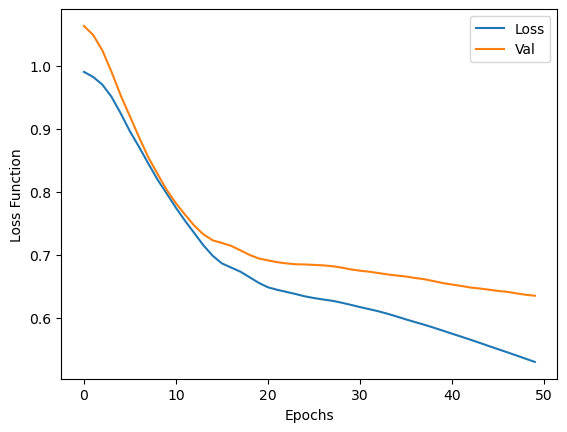

In [20]:
plt.plot(history.history["loss"], label ="Loss")
plt.plot(history.history["val_loss"], label = "Val")
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.legend()
plt.show() #Comparar batch size 

In [21]:
# np.save("batch_size64_loss_function",np.array(history.history["loss"]))
# np.save("batch_size64_val_function",np.array(history.history["val_loss"]))

In [22]:
# 6. Detect Anomalies
reconstructed_flux = autoencoder.predict(flux_normalized)
mse = np.mean(np.power(flux_normalized - reconstructed_flux, 2), axis=1)

#mse: Calculates the Mean Squared Error (MSE) between the original and reconstructed data for each observation.
#High MSE indicates a poor reconstruction, which could signal an anomaly.

# Set a threshold for anomaly detection (e.g., 95th percentile)
threshold = np.percentile(mse, 99)
anomalies = mse > threshold

#np.percentile(mse, 95): Determines the MSE value at the 95th percentile. 
#Observations with MSE above this threshold are considered anomalies.
#anomalies = mse > threshold: A boolean array where True indicates an anomaly.

5/5 [==============================] - 0s 1ms/step


In [23]:
# #anomalous_data_indices

# d = {"Flux": list(reconstructed_flux)}
# data = pd.DataFrame(data=d)
# #np.savetxt("reconstructed_flux", reconstructed_flux)

# #np.savetxt('reconstructed_flux.txt', reconstructed_flux)   # X is an array

# # df_anomalous = pd.read_pickle("default_anomalous.pkl")
# # df_anomalous

In [24]:
#data.to_pickle("reconstructed_fluxes.pkl")

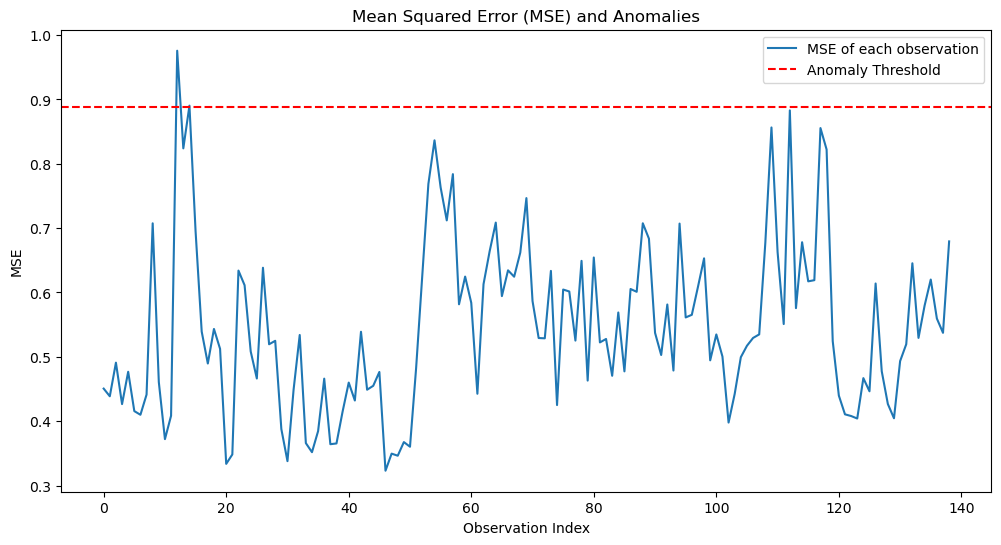

Anomalous Data Indices: [12 14]


In [25]:
# 7. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(mse, label='MSE of each observation')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.title('Mean Squared Error (MSE) and Anomalies')
plt.xlabel('Observation Index')
plt.ylabel('MSE')
plt.legend()
plt.show()

# 8. Analyze Anomalies
anomalous_data_indices = np.where(anomalies)[0]
print(f"Anomalous Data Indices: {anomalous_data_indices}")


In [26]:
len(anomalous_data_indices)

2

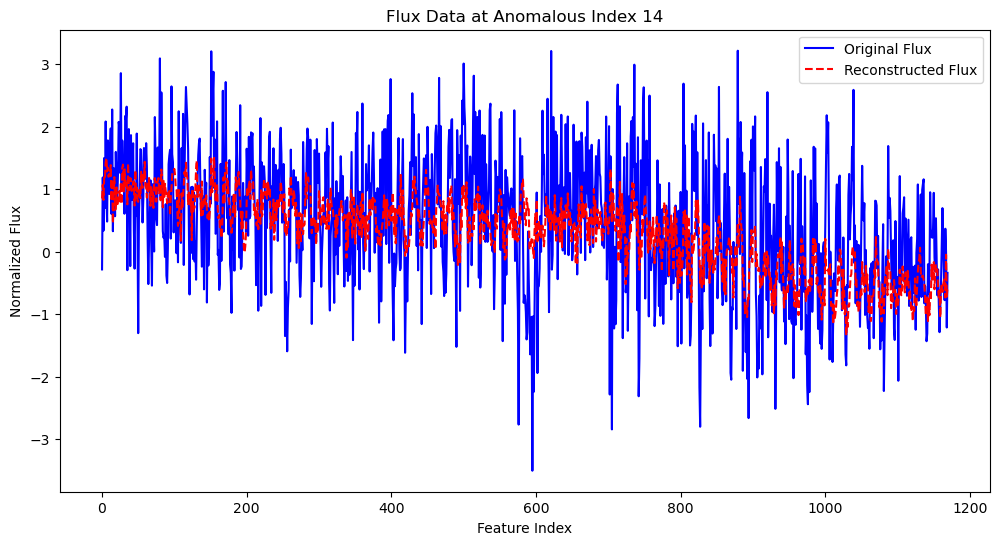

In [27]:
import matplotlib.pyplot as plt

# Index of the first anomaly
anomalous_index = anomalous_data_indices[1]

# Extract the original and reconstructed flux for the anomalous index
original_flux = flux_normalized[anomalous_index]
reconstructed_flux_at_index = reconstructed_flux[anomalous_index]

# Plot the original and reconstructed flux
plt.figure(figsize=(12, 6))
plt.plot(original_flux, label='Original Flux', color='blue')
plt.plot(reconstructed_flux_at_index, label='Reconstructed Flux', color='red', linestyle='--')
plt.title(f'Flux Data at Anomalous Index {anomalous_index}')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [28]:
########################################################

In [37]:
denormalized_output = scaler2.inverse_transform(reconstructed_flux)

# fig, ax = plt.subplots(figsize = (16,9))

# ax.set_xlabel("X-axis")
# ax.set_ylabel("Y-axis")

# ax.plot(df2["Velocity"][0:-1], df3["Flux"][14]) #Input plot
# ax.plot(df2["Velocity"][0:-1], denormalized_output[2]) #Input plot

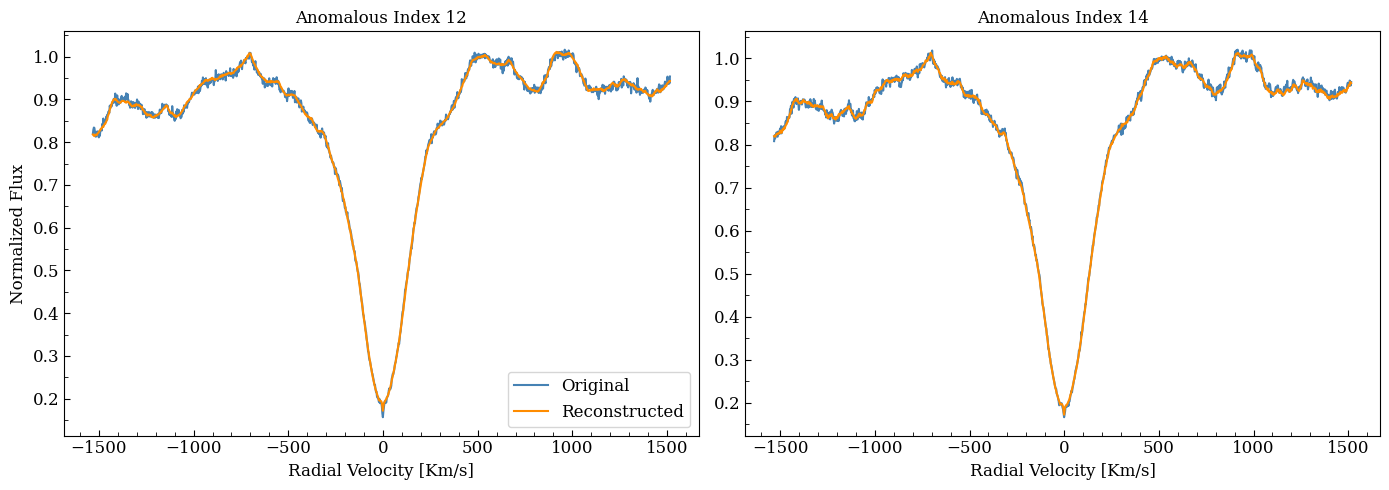

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ... (your other code)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Iterate over anomalous indices
for i, index in enumerate(anomalous_data_indices):
    ax = axes[i]  # Get the current subplot

    # Extract original and reconstructed spectra
    original_spectrum = df3["Flux"][index]
    reconstructed_spectrum = denormalized_output[index]

    # Plot spectra
    ax.plot(df2["Velocity"][0:-1], original_spectrum, label="Original", color="steelblue")
    ax.plot(df2["Velocity"][0:-1], reconstructed_spectrum, label="Reconstructed", color="darkorange")

    # Set labels and title
    ax.set_xlabel("Radial Velocity [Km/s]")
    
    ax.set_title(f"Anomalous Index {index}")

    # Add legend to the left plot
    if i == 0:
        ax.legend(loc=4)
        ax.set_ylabel("Normalized Flux")

    # Set grid, ticks, and tick parameters
    ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax.tick_params(axis='x', which='both', direction='in', length=4)
    ax.tick_params(axis='x', which='minor', direction='in', length=3)
    ax.tick_params(axis='y', which='both', direction='in', length=4)
    ax.tick_params(axis='y', which='minor', direction='in', length=3)

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
fig.savefig("Anomalous_comparison_HD.png")